# Magnetoteulluric Forward problem

## Frequency domain Maxwell equations
\begin{eqnarray}
    \nabla\times \mathbf{E} +i\omega \mu \mathbf{H} &=& \mathbf{0}\label{eq:curlE}\\
    \nabla \times \mathbf{H} -\boldsymbol{\sigma}\mathbf{E} &=& \mathbf{0}\label{eq:curlH}\\
    \nabla\cdot \mathbf{E} &=& 0\\
    \nabla\cdot\mathbf{H} &=& 0
\end{eqnarray}
<br> 
$\nabla\times$ is the curl operator, $\nabla\cdot$ is the divergence operator,<br>
$\mathbf{E}$ is the electric field (V/m), $\mathbf{H}$ is the magnetic intensity (A/m), (note magnetic field $\mathbf{B}=\mu \mathbf{H}$)<br>
$i=\sqrt{-1}$, $\omega$ is the frequency, $\mu=4\pi10^{-7}$ is magnetic permeability. <br>
$\boldsymbol{\rho}$ is resistivity ($\Omega$m), $\boldsymbol{\sigma}$ conductivity (S/m), $\boldsymbol{\sigma}=\boldsymbol{\rho}^{-1}$

Convert to separate systems for $\mathbf{E}$
\begin{equation}
\nabla\times(\nabla\times \mathbf{E}) +i\omega \mu\boldsymbol{\sigma}\mathbf{E} = \mathbf{0}
\end{equation}
and for $\mathbf{H}$
\begin{equation}
\nabla\times(\boldsymbol{\rho}\nabla \times \mathbf{H}) +i\omega \mu\mathbf{H} = \mathbf{0}
\end{equation}

Vector identity
\begin{equation}
\nabla\times(\nabla\circ)=\nabla(\nabla\cdot\circ)-\nabla\cdot(\nabla\circ)
\end{equation}
with $\nabla$ the gradient operator.

<figure>
  <img src="pictures/MT_domain.png">
  <figcaption>
    <center>
      Figure 2.1: Example 1: MT domain
    </center>
  </figcaption>
 </figure>
 

## 2D isotropic simplification
$\boldsymbol{\sigma}=\sigma \textbf{I}_3$, where $\textbf{I}_3$ is a $3\times3$ identity matrix.

Derivatives in the $x_2$ direction are zero.




### TE mode

\begin{equation}\label{EQ:E_2PDE}
    \nabla\cdot(\nabla E_2) - i\omega\mu\sigma E_2 = 0.
\end{equation}

Assume $E_2$ is a constant on the top boundary, zero on the bottom boundary and Neumann conditions on the side boundaries $\left(\frac{\partial E_2}{\partial x_0}=0\right)$.

Weak form, using integration by parts,
\begin{equation}
\int_{\Omega}\nabla E_2\cdot\nabla \psi~d\Omega +\int_{\Omega} i\omega\mu\sigma E_2\cdot \psi d\Omega = 0
\end{equation}
where $\psi$ are test functions that satisfy the boundary conditions.

### TM mode

\begin{equation}\label{EQ:H_2PDE}
    \nabla\cdot(\rho\nabla H_2) - i\omega\mu H_2 = 0.
\end{equation}

Assume $H_2$ is a constant in the air layer, zero on the bottom boundary and Neumann conditions on the side boundaries $\left(\frac{\partial H_2}{\partial x_0}=0\right)$.

Weak form, using integration by parts,
\begin{equation}
\int_{\Omega}\rho\nabla H_2\cdot\nabla \phi~d\Omega +\int_{\Omega} i\omega\mu H_2\cdot \phi d\Omega = 0
\end{equation}
where $\phi$ are test functions that satisfy the boundary conditions.


## Example
<figure>
  <img src="pictures/PACEforward.png", width="400">  <img src="pictures/zoomPACEforward.png", width="355">
  <figcaption>
    <center>
      Resistivity
    </center>
  </figcaption>
 </figure>


#### Make a mesh
<figure>
  <img src="pictures/PaceMesh.png", width="400">  <img src="pictures/zoomPaceMesh.png", width="400">
  <figcaption>
    <center>
      Resistivity
    </center>
  </figcaption>
 </figure>

## Forward MT Code

In [1]:
# modules

import numpy as np
from esys.finley import ReadGmsh
from MTmodel import MT2Dmodel
from esys.escript import *
from esys.escript.pdetools import Locator, MaskFromTag

In [2]:
# Input data

# mesh name
mesh_name = "mesh/MT2DPACE.msh"

### Periods log base 10
pstart = -2       # smallest period, 0.01
pend = 2          # largest period, 100. 
pnum = 10         # number of periods

### sensors measurement within the element, just below ground level
cg = 100.                   # mesh size at core ground level
snum = 41;                   # number of sensors
sspan = 18000.0;            # span of sensors

# blob 
blobL = -4000.              # left
blobR = 4000.               # right
blobT = -2000.              # top
blobB = -5000.

# conductivity of the background and the blob
sigma_BG = 1./100
sigma_blob = 1./10

# ground level
airLayer = 0.0

mu = 4*np.pi*1e-7

fixBottom = True

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
periods=np.logspace(pstart, pend, num=pnum, endpoint=True, base=10.0, dtype=float)
print("periods")
print(periods)
print()
sx = sspan/(snum-1);
s1 = sspan/2;sensors = []
sg = min(sx/20.,cg);
sensors=[]
print("sensors")
for ind1 in range(snum):
    sensors.append((-s1 + ind1*sx, -2.*sg/3., 0.))
    print((-s1 + ind1*sx, -2.*sg/3., 0.))

periods
[1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]

sensors
(-9000.0, -15.0, 0.0)
(-8550.0, -15.0, 0.0)
(-8100.0, -15.0, 0.0)
(-7650.0, -15.0, 0.0)
(-7200.0, -15.0, 0.0)
(-6750.0, -15.0, 0.0)
(-6300.0, -15.0, 0.0)
(-5850.0, -15.0, 0.0)
(-5400.0, -15.0, 0.0)
(-4950.0, -15.0, 0.0)
(-4500.0, -15.0, 0.0)
(-4050.0, -15.0, 0.0)
(-3600.0, -15.0, 0.0)
(-3150.0, -15.0, 0.0)
(-2700.0, -15.0, 0.0)
(-2250.0, -15.0, 0.0)
(-1800.0, -15.0, 0.0)
(-1350.0, -15.0, 0.0)
(-900.0, -15.0, 0.0)
(-450.0, -15.0, 0.0)
(0.0, -15.0, 0.0)
(450.0, -15.0, 0.0)
(900.0, -15.0, 0.0)
(1350.0, -15.0, 0.0)
(1800.0, -15.0, 0.0)
(2250.0, -15.0, 0.0)
(2700.0, -15.0, 0.0)
(3150.0, -15.0, 0.0)
(3600.0, -15.0, 0.0)
(4050.0, -15.0, 0.0)
(4500.0, -15.0, 0.0)
(4950.0, -15.0, 0.0)
(5400.0, -15.0, 0.0)
(5850.0, -15.0, 0.0)
(6300.0, -15.0, 0.0)
(6750.0, -15.0, 0.0)
(7200.0, -15.0, 0.0)
(7650.0, -15.0, 0.0)
(8100.0, -15.0, 0.

In [4]:
# domain
domain = ReadGmsh(mesh_name, numDim=2)

X = ContinuousFunction(domain).getX()
Rground = MaskFromTag(domain,"core","buffer")         # Solution Space
Rground.expand()                             
Rair = 1-Rground

GrndF = Scalar(0.,Function(domain))                   # Function Space            
GrndF.setTaggedValue("core",1.)
GrndF.setTaggedValue("buffer",1.)
GrndF.expand()

In [5]:
model = MT2Dmodel(domain, sigma_BG, sensors, periods, 
                        mu=mu, fixBottom = fixBottom, airLayer = airLayer)

In [6]:
# define conductivity and resistivity
blob = (wherePositive(X[0] - blobL)*whereNegative(X[0] - blobR)*wherePositive(X[1]-blobB)*whereNegative(X[1]-blobT))
sigmaCF = blob*sigma_blob +(Rground - blob)*sigma_BG + Rair*0.0
rhoCF = blob*1./sigma_blob +(Rground - blob)/sigma_BG + Rair*1e10
model.setSigmaRhoForward(sigmaCF, rhoCF, Ground = GrndF)

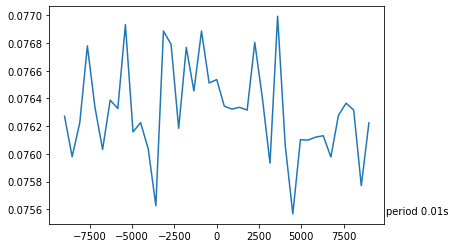

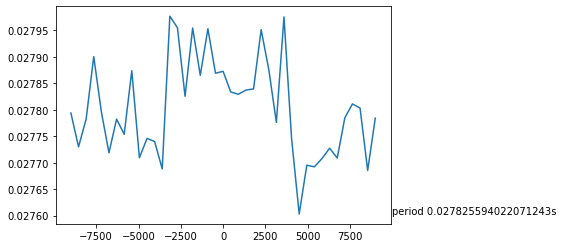

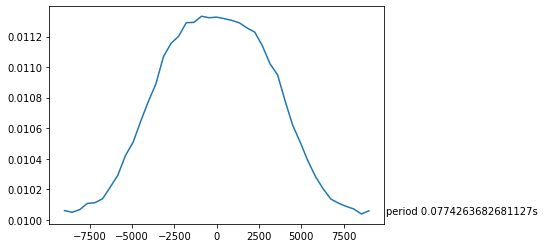

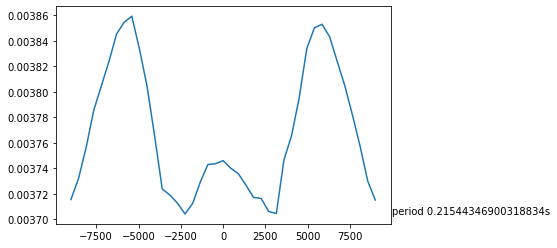

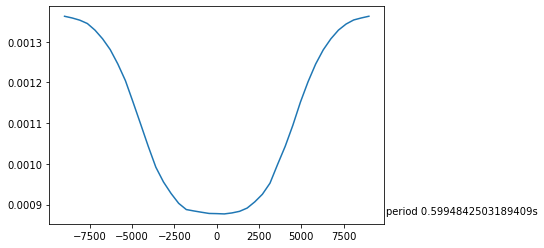

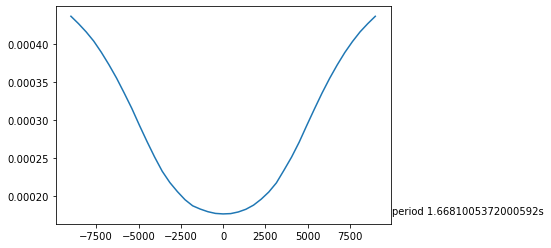

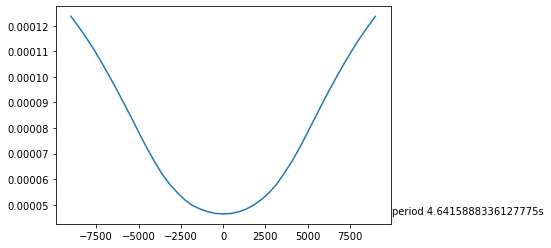

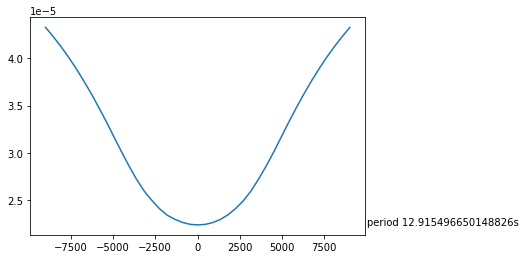

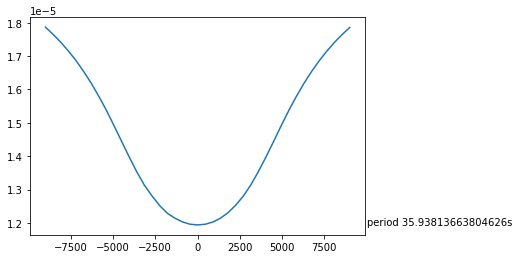

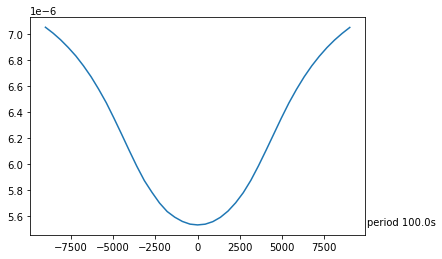

In [7]:
# compute electric field, magnetic field and impedances
Exs, Hxs, Zxy, Zyx = model.getExHxZs()

from matplotlib import pyplot as plt

for k in range(pnum):
    xxx=[]
    zzz=[]
    d = Zxy[k]
    for j in range(len(d)):
        zzz.append(abs(d[j])**2)
        xxx.append(-s1 + j*sx)
    plt.figure()
    plt.text(10000.,min(zzz),"period "+str(periods[k])+"s")        
    plt.plot(xxx,zzz)
    
plt.show()

